In [2]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Week 4: Lecture 08 ##

## Categorical Distribution ##

In [3]:
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


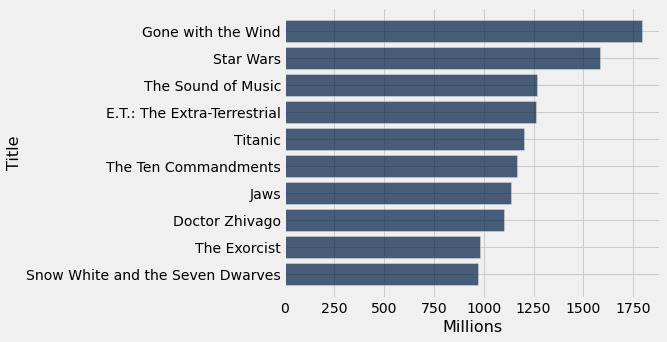

In [4]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross (Adjusted)')/1000000,3))

top_movies.take(np.arange(10)).barh('Title', 'Millions')
#top_movies

In [5]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [6]:
studio_distribution = studios.group('Studio')

In [7]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [8]:
sum(studio_distribution.column('count'))

200

In [9]:
top_movies.num_rows

200

## Bar Charts ##

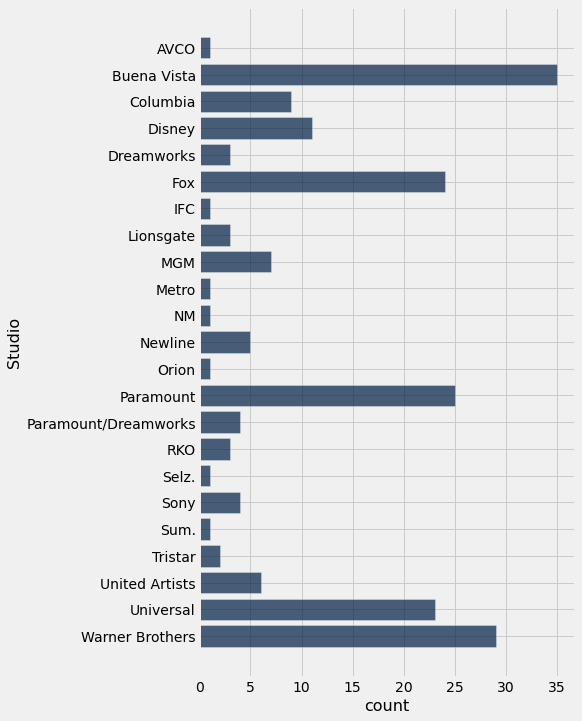

In [10]:
studio_distribution.barh('Studio')

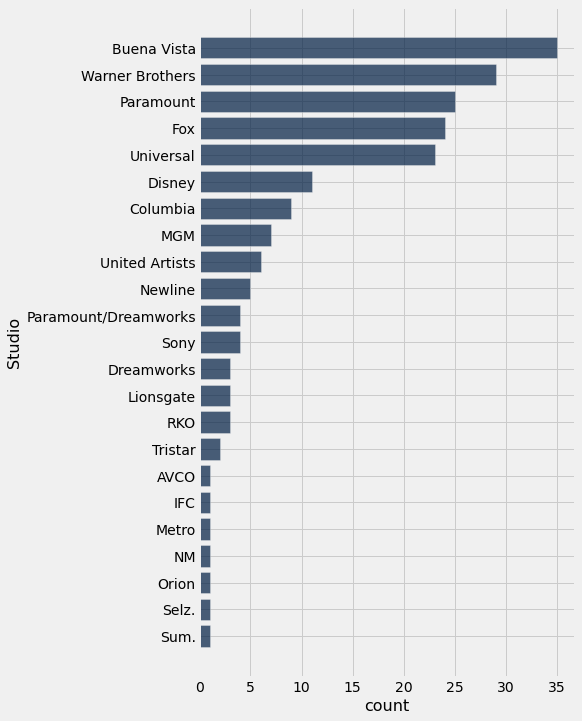

In [11]:
studio_distribution.sort('count', descending=True).barh('Studio')

In [12]:
studio_distribution.sort('count', descending=True)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25
Fox,24
Universal,23
Disney,11
Columbia,9
MGM,7
United Artists,6
Newline,5


## Numerical Distribution ##

In [13]:
ages = 2022 - top_movies.column('Year')
# ages: what is this data type? ARRAY
top_movies = top_movies.with_column('Age', ages)
ages

array([ 83,  45,  57,  40,  25,  66,  47,  57,  49,  85,   7,  61,  42,
        63,  13,  39,  29,  23,  28,  49,  41,  55,  81,   7,  50,  28,
        58,  44,  10,  57,  14,  55,  63,  38,  18,  53,  52,  20,  26,
        32,  82,  59,  38,  58,  52,  49,  69,  16,  66,  80,  48,  33,
        77,  19,  19,  48,   6,  72,  18,  70,  58,  44,  18,  17,  37,
        20,  10,  23,  44,  40,  45,   5,   6,  61,  21,  67,  45,  60,
        47,  46,  76,  50,  21,  26,  25,  65,  13,  59,  62,  47,  52,
        38,   7,  20,  29,  30,  12,  32,   9,  76,  10,  19,  69,  68,
        25,  33,  21,   9,  15,   9,  31,  81,  22,  36,  11,  23,  21,
        15,   9,   6,  19,  15,  36, 101,  24,   5,  48,  69,  38,  31,
        17,  17,  15,  20,  29,  68,  14,  11,  18,  14,  27,   5,  32,
        40,  54,  34,   6,  55,   7,   8,  43,  24,  62,  40,  15,  37,
        27,   6,  32,  48,  12,  18,  22,  30,   6,  35,  20,   8,   7,
        26,   8,   7,  45,  41,  23,  13,  19,  18,  54,  22,  2

In [27]:
top_movies.where('Age',97)

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age


## Binning ##

In [18]:
min(ages), max(ages)

(5, 101)

In [19]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [28]:
binned_data = top_movies.bin('Age', bins = my_bins)
type(binned_data) #the data type?
#sum(binned_data.column('Age count'))
binned_data
# what does the 8th row in my binned_data table represent?

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,20
100,0


In [17]:
# There are 0 movies that are 0-4 years old, in our top_movies_2017 database.
# There are 25 movies that are 5-9 years old.

# There are 0 movies that are 100 years old.

In [18]:
sum(binned_data.column('Age count'))

200

In [34]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 101)
my_bins
new_bins = top_movies.bin('Age', bins = my_bins)
# how would you interpret the last row below?
# in a sentence:

new_bins

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
101,0


In [35]:
25+16+40+42+56+21

200

In [20]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))
# np.arange(0,60,25) = (0, 25, 50)
# how many bins? 2

bin,Age count
0,85
25,69
50,0


In [21]:
top_movies.where('Age', 49)

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
The Godfather,Paramount,134966411,701621600,1972,701.622,49
The Poseidon Adventure,Fox,84563118,488078400,1972,488.078,49
"What's Up, Doc?",Warner Brothers,66000000,345141200,1972,345.141,49


## Histograms ##

In [22]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [23]:
binned_data

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


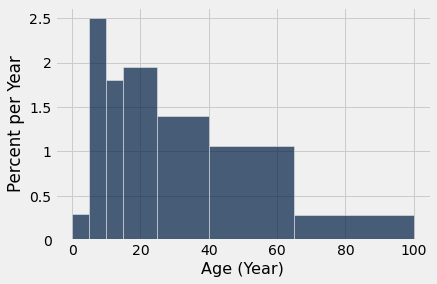

In [24]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

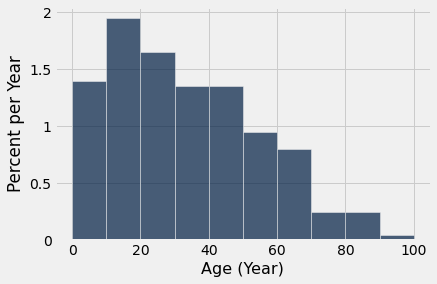

In [25]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

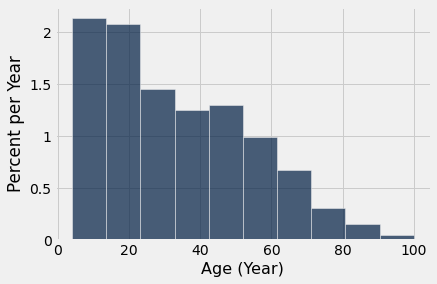

In [26]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [27]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [28]:
binned_data

bin,Age count,Percent
0,3,1.5
5,25,12.5
10,18,9
15,39,19.5
25,42,21
40,53,26.5
65,20,10
100,0,0


## Height ##

### Question: What is the height of the [40, 65] bin?

In [29]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [30]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [31]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.06

### What are the heights of the rest of the bins?

In [32]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [33]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [34]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths # percent/widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [35]:
bin_lefts

bin,Age count,Percent,Width,Height
0,3,1.5,5,0.3
5,25,12.5,5,2.5
10,18,9,5,1.8
15,39,19.5,10,1.95
25,42,21,15,1.4
40,53,26.5,25,1.06
65,20,10,35,0.285714


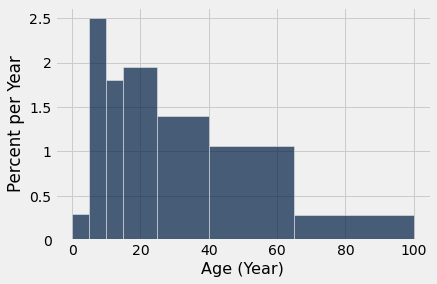

In [36]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')